## [Dogs vs Cats](https://www.kaggle.com/c/dogs-vs-cats/data)

In [1]:
import os
import random
import numpy as np
import torch
import torchvision

In [2]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

seed_everything(42)

In [3]:
from google.colab import drive 
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
!mkdir -p /content/data/dvc
%cd /content/data/dvc

/content/data/dvc


In [5]:
if True:
    !cp '/content/drive/My Drive/data/dogs_vs_cats/train.zip' /content/data
    !cp '/content/drive/My Drive/data/dogs_vs_cats/test1.zip' /content/data
    !unzip /content/data/train.zip
    !unzip /content/data/test1.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: test1/5499.jpg          
  inflating: test1/55.jpg            
  inflating: test1/550.jpg           
  inflating: test1/5500.jpg          
  inflating: test1/5501.jpg          
  inflating: test1/5502.jpg          
  inflating: test1/5503.jpg          
  inflating: test1/5504.jpg          
  inflating: test1/5505.jpg          
  inflating: test1/5506.jpg          
  inflating: test1/5507.jpg          
  inflating: test1/5508.jpg          
  inflating: test1/5509.jpg          
  inflating: test1/551.jpg           
  inflating: test1/5510.jpg          
  inflating: test1/5511.jpg          
  inflating: test1/5512.jpg          
  inflating: test1/5513.jpg          
  inflating: test1/5514.jpg          
  inflating: test1/5515.jpg          
  inflating: test1/5516.jpg          
  inflating: test1/5517.jpg          
  inflating: test1/5518.jpg          
  inflating: test1/5519.jpg          
  inflating: test1/552.jpg           
  inflating: t

In [6]:
base_dir = '/content/data/dvc'

In [7]:
data_dir = base_dir + '/train'

In [8]:
files = os.listdir(data_dir)
print(len(files))
print(files[:100])

25000
['dog.12457.jpg', 'dog.6743.jpg', 'cat.9220.jpg', 'cat.7588.jpg', 'cat.6782.jpg', 'cat.1811.jpg', 'dog.3838.jpg', 'cat.3917.jpg', 'cat.7239.jpg', 'dog.11285.jpg', 'dog.4252.jpg', 'cat.8674.jpg', 'dog.6440.jpg', 'dog.6132.jpg', 'dog.3005.jpg', 'dog.8528.jpg', 'cat.65.jpg', 'dog.10317.jpg', 'dog.6811.jpg', 'cat.6212.jpg', 'dog.2926.jpg', 'dog.5204.jpg', 'dog.5559.jpg', 'cat.10426.jpg', 'cat.12052.jpg', 'dog.9570.jpg', 'dog.7442.jpg', 'cat.9787.jpg', 'dog.4088.jpg', 'dog.11053.jpg', 'cat.5948.jpg', 'cat.2212.jpg', 'dog.12390.jpg', 'cat.9599.jpg', 'cat.1849.jpg', 'cat.7850.jpg', 'cat.9161.jpg', 'dog.9668.jpg', 'dog.3213.jpg', 'dog.4945.jpg', 'cat.11429.jpg', 'cat.8213.jpg', 'cat.6066.jpg', 'dog.6409.jpg', 'dog.10638.jpg', 'dog.9172.jpg', 'cat.12438.jpg', 'dog.6498.jpg', 'cat.1987.jpg', 'cat.10023.jpg', 'cat.4741.jpg', 'dog.7073.jpg', 'cat.5715.jpg', 'dog.6633.jpg', 'dog.1187.jpg', 'cat.624.jpg', 'cat.1099.jpg', 'cat.7762.jpg', 'dog.833.jpg', 'cat.9525.jpg', 'dog.3162.jpg', 'cat.5375.

In [9]:
dogs = 0
cats = 0

for i, f in enumerate(files):
  if 'dog' in f: dogs += 1
  if 'cat' in f: cats += 1

print('dogs = {}, cats = {}'.format(dogs, cats))


dogs = 12500, cats = 12500


In [10]:
from PIL import Image
from torch.utils.data import Dataset

class DogsVsCatsDataset(Dataset): 
  def __init__(self, base_dir, transform=None):
    self.base_dir = base_dir
    self.transform = transform
    self.files = os.listdir(data_dir)
    self.targets = []
    for i, f in enumerate(self.files):
      if 'dog' in f: self.targets.append(0)
      if 'cat' in f: self.targets.append(1)

  def __len__(self): 
    return len(self.targets)

  def __getitem__(self, idx): 
    image_path = self.base_dir + '/' + self.files[idx]
    image = Image.open(image_path)
    image = image.convert('RGB')
    
    if self.transform:
      image = self.transform(image)    
    return image, self.targets[idx]


In [11]:
dataset = DogsVsCatsDataset(data_dir)

In [12]:
print(type(dataset))

# tuple: (image, target)

__main__.DogsVsCatsDataset


In [13]:
print(len(dataset))

25000


In [14]:
n = 200
data, target = dataset[n]

In [15]:
print(type(data))

<class 'PIL.Image.Image'>


In [16]:
print(data.mode, data.width, data.height)

RGB 500 439


In [17]:
print(type(target))

<class 'int'>


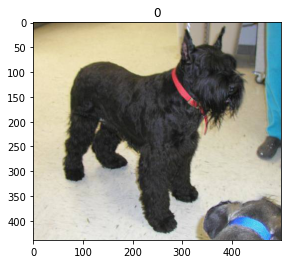

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.title(target)
plt.imshow(data)
data.show()

In [19]:
import torchvision.transforms as transforms
# batch must contain tensors, numpy arrays, numbers, dicts or lists
compose = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])
dataset = DogsVsCatsDataset(data_dir, transform=compose)

In [20]:
data_loader = torch.utils.data.DataLoader(dataset,
                                          batch_size=1,
                                          shuffle=True)

torch.Size([1, 3, 224, 224])
torch.Size([3, 224, 224])


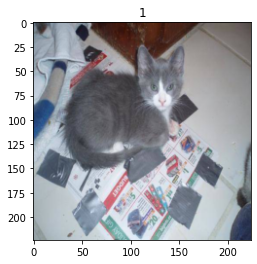

In [21]:
ToPILImage = transforms.Compose([
    transforms.ToPILImage()
])

for data, target in data_loader:
    print(data.shape)
    data = data.squeeze() # 불필요한 차원 하나를 줄인다(batch_size=1)
    print(data.shape)
    pic = ToPILImage(data)
    plt.title(int(target))
    plt.imshow(pic)
    plt.show()
    break

In [22]:
data_loader = torch.utils.data.DataLoader(dataset,
                                          batch_size=10,
                                          shuffle=True)

torch.Size([10, 3, 224, 224])
torch.Size([3, 224, 224])


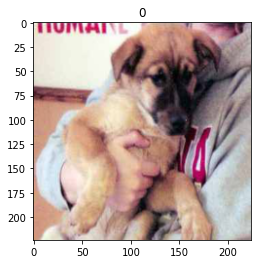

In [23]:
ToPILImage = transforms.Compose([
    transforms.ToPILImage()
])

for data, target in data_loader:
    index = 5
    print(data.shape)
    img = data[index]
    print(img.shape)
    pic = ToPILImage(img)
    plt.title(int(target[index]))
    plt.imshow(pic)
    plt.show()
    break

In [24]:
%matplotlib inline

import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.utils as utils
import torchvision.transforms as transforms

is_cuda = torch.cuda.is_available()
device = torch.device('cuda' if is_cuda else 'cpu')

In [25]:
import torchvision.transforms as transforms
compose_train = transforms.Compose([
                      transforms.Resize(255),
                      transforms.CenterCrop(224),
                      transforms.RandomHorizontalFlip(),
                      transforms.RandomRotation(10),
                      transforms.RandomAffine(0, shear=10, scale=(0.8, 1.2)),
                      transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
                      transforms.ToTensor(),
                      transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
                      ])
compose_test = transforms.Compose([
    transforms.Resize(255),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
])

dataset = DogsVsCatsDataset(data_dir)

In [26]:
from copy import copy

train_size = 20000
test_size = 5000

train_data, test_data = torch.utils.data.random_split(dataset, [train_size, test_size])
train_data.dataset = copy(dataset)
train_data.dataset.transform = compose_train
test_data.dataset.transform = compose_test

In [27]:
print('train sets: {}'.format(len(train_data)))
print('test sets: {}'.format(len(test_data)))

train sets: 20000
test sets: 5000


In [28]:
BATCH_SIZE = 10

train_loader = torch.utils.data.DataLoader(train_data,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)

In [29]:
import torchvision.models as models

model = models.resnet18(pretrained=True)
for param in model.parameters():
    param.requires_grad = False

model.l1 = nn.Linear(512, 256)
nn.init.kaiming_normal_(model.l1.weight)
model.l2 = nn.Linear(256, 128)
nn.init.kaiming_normal_(model.l2.weight)
model.l3 = nn.Linear(128, 2)
nn.init.kaiming_normal_(model.l3.weight)

model.fc = nn.Sequential(nn.BatchNorm1d(512),
                         nn.Dropout(0.5),
                         model.l1,
                         nn.BatchNorm1d(256),
                         nn.Dropout(0.5),
                         model.l2,
                         nn.BatchNorm1d(128),
                         nn.Dropout(0.5),
                         model.l3,
                         nn.BatchNorm1d(2)
                      )
model = model.to(device)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


In [30]:
n = 0
for data, target in train_loader:
    print(data.shape) # (batch, channel, width, height)
    break

data = data.to(device)

with torch.no_grad():
    y = model(data)
    print(y)
    print(np.argmax(y.cpu(), axis=1), target)

torch.Size([10, 3, 224, 224])
tensor([[-1.1098, -0.3181],
        [ 1.6542, -1.7875],
        [ 0.1753,  0.5922],
        [ 0.5208, -0.7607],
        [ 0.6218, -0.4971],
        [-0.2579,  1.7179],
        [-0.8506, -0.0322],
        [-1.8403, -0.7141],
        [ 0.0063,  1.3719],
        [ 1.0800,  0.4278]], device='cuda:0')
tensor([1, 0, 1, 0, 0, 1, 1, 1, 1, 0]) tensor([1, 1, 0, 0, 0, 0, 0, 1, 0, 0])


In [31]:
BATCH_SIZE = 200

train_loader = torch.utils.data.DataLoader(train_data,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)

In [32]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)
criterion = nn.CrossEntropyLoss().to(device)

n_epochs = 1 # 1회 학습

list_training_loss = []
list_test_loss = []
batch_length = int(len(train_data) / BATCH_SIZE)

for epoch in range(n_epochs):
    n_train = 0
    train_loss = 0
    model.train()
    for train_data, train_target in train_loader:
        train_data = train_data.to(device)
        train_target = train_target.to(device)
        y = model(train_data)
        del train_data
        loss = criterion(y, train_target).sum()
        train_loss += loss.data.cpu().numpy()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        n_train += 1
        del train_target
        if( n_train % 10 == 0 ):
          print('epoch {}th: {}/{} loss - {}'.format(epoch, n_train, batch_length, loss.data.cpu().numpy().sum()))

    model.eval()
    n_test = 0
    test_loss = 0
    correct = 0
    total = 0
    for test_data, test_target in test_loader:
        test_data = test_data.to(device)
        test_target = test_target.to(device)
        y_pred = model(test_data)
        idx_pred = torch.max(y_pred, 1)[1]
        del test_data
        loss = criterion(y_pred, test_target).sum()
        test_loss += loss.data.cpu().numpy()
        n_test += 1
        total += len(test_target)
        correct += (idx_pred == test_target).sum()

    accuracy = correct * 100 / total
    print('epoch {}th training loss: {} test loss: {}, accuracy: {}'.format(
            epoch + 1, train_loss / n_train, test_loss / n_test,
            accuracy
        ))
    list_training_loss.append(train_loss / n_train)
    list_test_loss.append(test_loss / n_test)

epoch 0th: 10/100 loss - 0.29279813170433044
epoch 0th: 20/100 loss - 0.2688399851322174
epoch 0th: 30/100 loss - 0.2368711680173874
epoch 0th: 40/100 loss - 0.2300797402858734
epoch 0th: 50/100 loss - 0.19047756493091583
epoch 0th: 60/100 loss - 0.18851009011268616
epoch 0th: 70/100 loss - 0.20892074704170227
epoch 0th: 80/100 loss - 0.18992269039154053
epoch 0th: 90/100 loss - 0.19420179724693298
epoch 0th: 100/100 loss - 0.20012789964675903
epoch 1th training loss: 0.22606673777103425 test loss: 0.12925472497940063, accuracy: 97.57999420166016


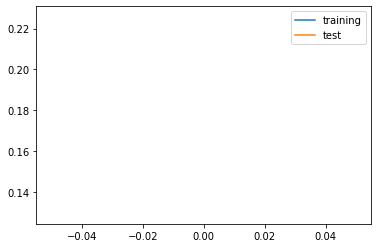

In [34]:
import matplotlib.pyplot as plt

plt.plot(list_training_loss, label='training')
plt.plot(list_test_loss, label='test')
plt.legend()
plt.show()